<a href="https://colab.research.google.com/github/DeepthiVReddy/Mutual-Fund-Recommendations/blob/main/Customer_Segmentation_and_Behavioral_Risk_Clustering_for_Mutual_Fund_Purchase_Decisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

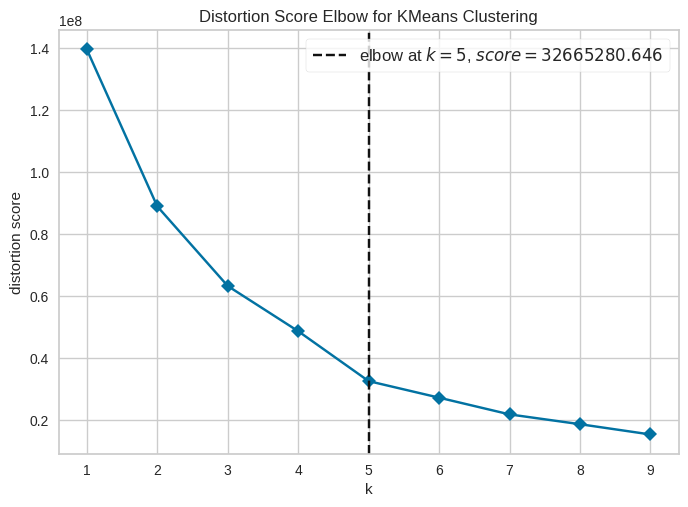

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the dataset
df = pd.read_csv("CaseFundCustomer.csv")

# Select the features for clustering
features = df[['time', 'type_cnt', 'num_search_click', 'risk_level_mean',
               'risk_level_std', 'rw1', 'risk_level_buy']]

# Use KElbowVisualizer to determine the optimal number of clusters
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)
visualizer.fit(features)
visualizer.show()


In [ ]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns

# Debug the data if needed
for col in numeric_columns:
    print(f"Column: {col}")
    print(df[col].unique())

# Clean the data
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN if necessary
df = df.dropna(subset=numeric_columns)

# Group by cluster and calculate the mean
cluster_profiles = df.groupby('cluster')[numeric_columns].mean()
print(cluster_profiles)



Column: time
[ 83.85714286  29.66666667  34.31578947 ... 209.29509197  51.86666667
  92.57894737]
Column: type_cnt
[5 2 1 3 4 6]
Column: num_search_click
[ 48.          11.33333333  19.         ...  21.28        17.44444444
 101.62222222]
Column: risk_level_mean
[2.94444444 2.66666667 2.22222222 3.25       2.23529412 3.33333333
 2.95652174 2.88235294 2.625      3.19444444 3.         2.88888889
 2.5        3.5        2.45454545 2.         2.33333333 3.03846154
 2.8125     2.53846154 2.16666667 3.28571429 2.94594595 2.75
 2.36363636 2.125      2.86666667 2.57142857 3.32352941 2.68
 2.58333333 2.90909091 2.72727273 3.09090909 2.4        2.6
 2.94285714 1.55555556 2.62264151 2.76923077 2.9        2.63157895
 2.85714286 2.8        2.63636364 2.42857143 2.91666667 2.62962963
 2.81632653 2.85185185 2.7        2.81818182 3.15789474 2.54545455
 2.88461538 2.89189189 2.25       2.28571429 3.0625     3.05
 2.41666667 3.06666667 3.17647059 2.69230769 2.70588235 3.1
 2.83333333 3.07142857 2.3823529

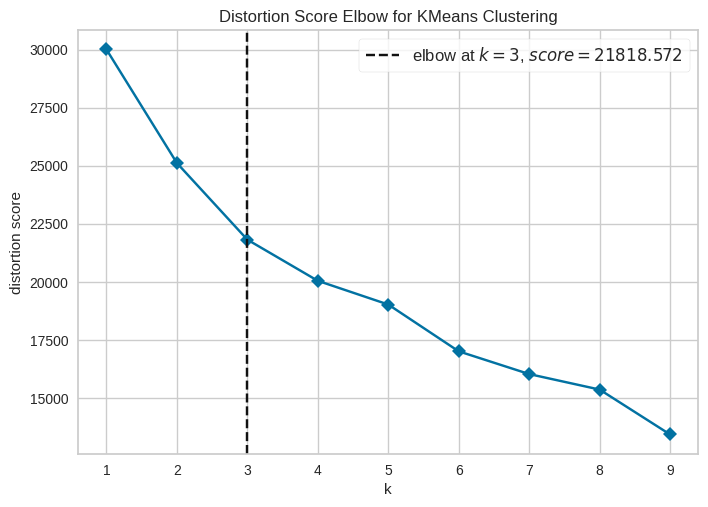

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select relevant columns for clustering
features = [
    "time", "type_cnt", "num_search_click",
    "risk_level_mean", "risk_level_std",
    "rw1", "risk_level_buy"
]
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a KMeans instance
kmeans = KMeans(random_state=42)

# Use KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)

# Fit the visualizer on the data
visualizer.fit(X_scaled)

# Display the plot
visualizer.show()


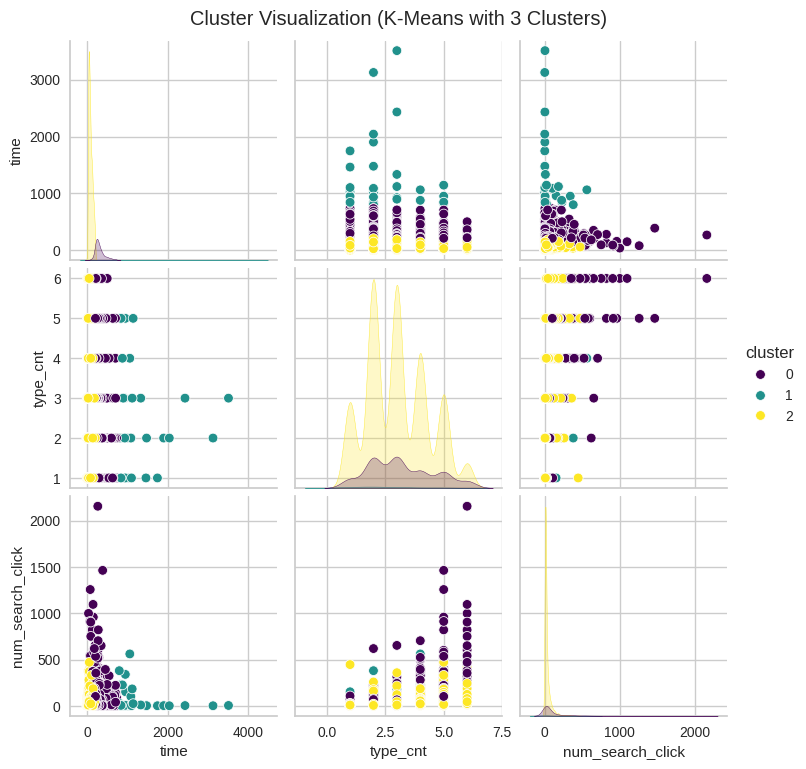

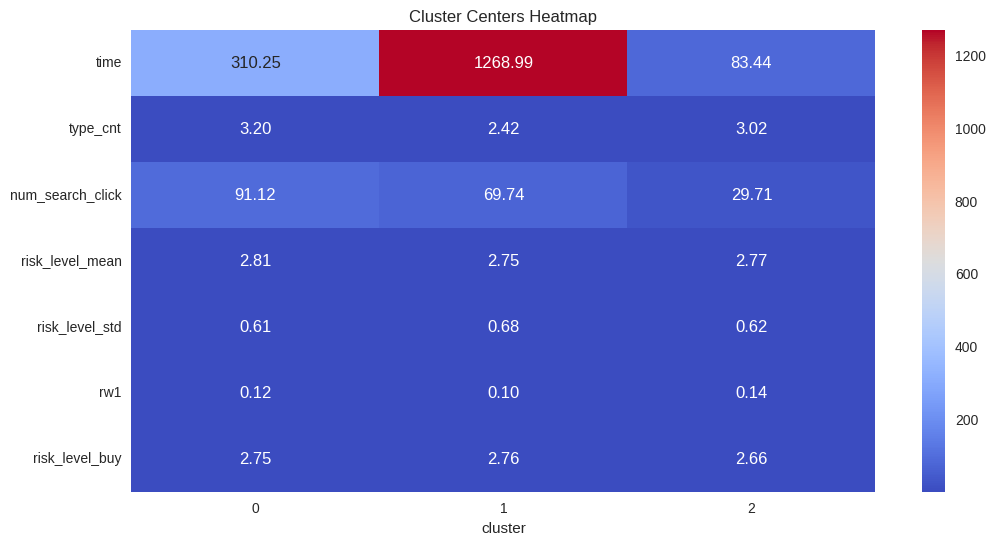

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select relevant columns for clustering
features = [
    "time", "type_cnt", "num_search_click",
    "risk_level_mean", "risk_level_std",
    "rw1", "risk_level_buy"
]
X = data[features]

# Fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
# Pairplot for the first few variables to visualize the clustering
sns.pairplot(data, vars=["time", "type_cnt", "num_search_click"], hue="cluster", palette="viridis", diag_kind="kde")
plt.suptitle("Cluster Visualization (K-Means with 3 Clusters)", y=1.02)
plt.show()

# Visualize cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
cluster_centers['cluster'] = range(3)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers.set_index('cluster').T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Centers Heatmap")
plt.show()


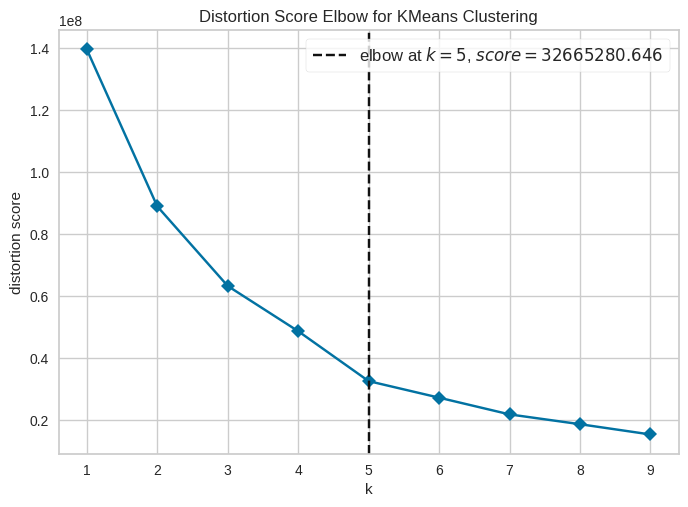

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select variables from "time" to "risk_level_buy"
features = data.loc[:, "time":"risk_level_buy"]

# Create a KMeans instance
kmeans = KMeans(random_state=42)

# Use KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)

# Fit the visualizer on the data
visualizer.fit(features)

# Display the elbow plot
visualizer.show()


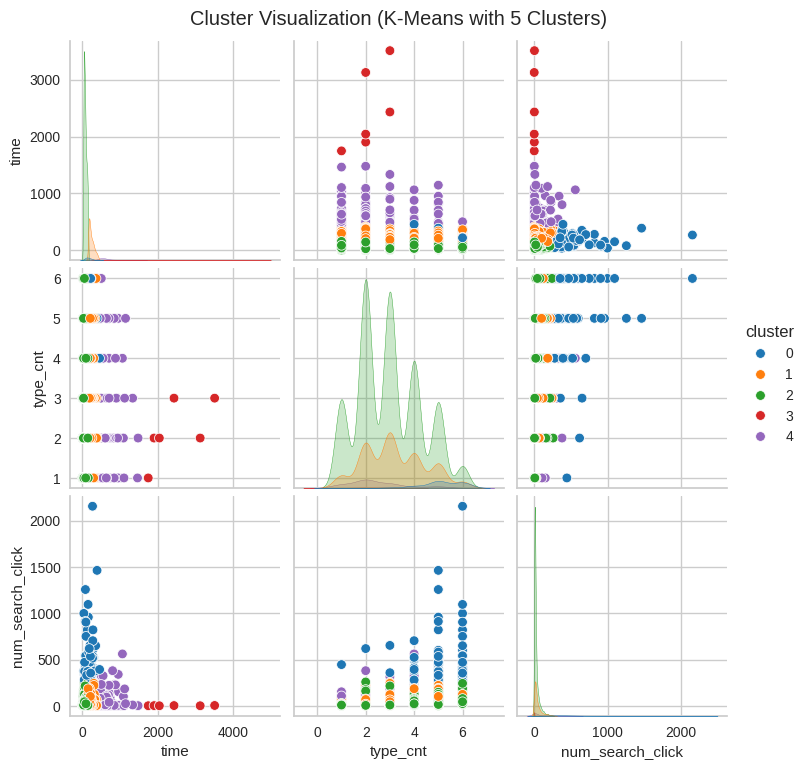

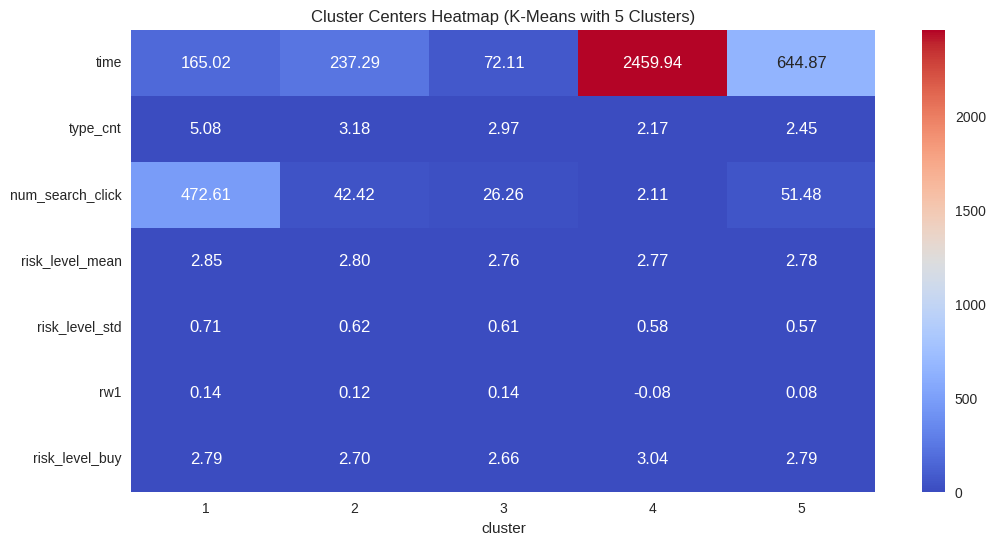

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select variables from "time" to "risk_level_buy"
features = data.loc[:, "time":"risk_level_buy"]

# Fit the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters using a pairplot
sns.pairplot(data, vars=["time", "type_cnt", "num_search_click"], hue="cluster", palette="tab10", diag_kind="kde")
plt.suptitle("Cluster Visualization (K-Means with 5 Clusters)", y=1.02)
plt.show()

# Visualize the cluster centers using a heatmap
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
cluster_centers['cluster'] = range(1, 6)

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers.set_index('cluster').T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Centers Heatmap (K-Means with 5 Clusters)")
plt.show()


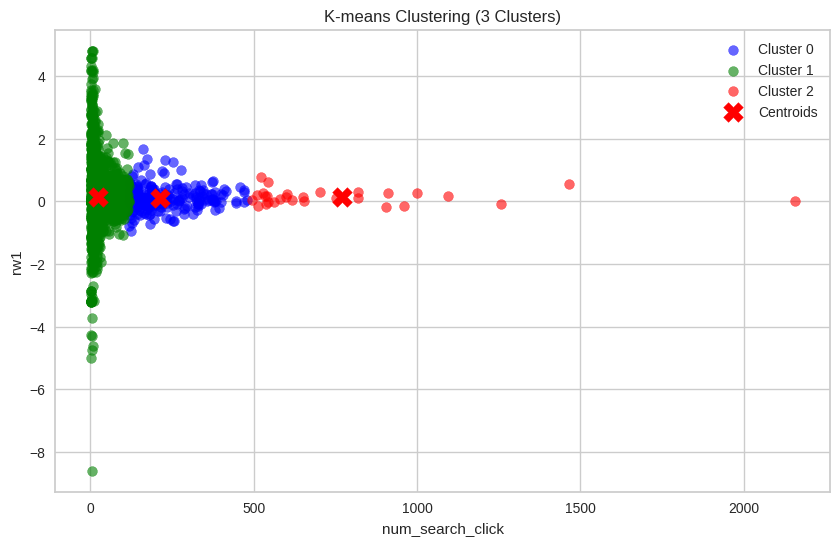

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the variables to plot
x_col = "num_search_click"  # Replace with x-axis column, e.g., "Session Count"
y_col = "rw1"  # Replace with y-axis column, e.g., "Percentage of Sessions with Purchases"

# Fit KMeans with the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[[x_col, y_col]])

# Plot the results
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(
        cluster_data[x_col],
        cluster_data[y_col],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (3 Clusters)")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


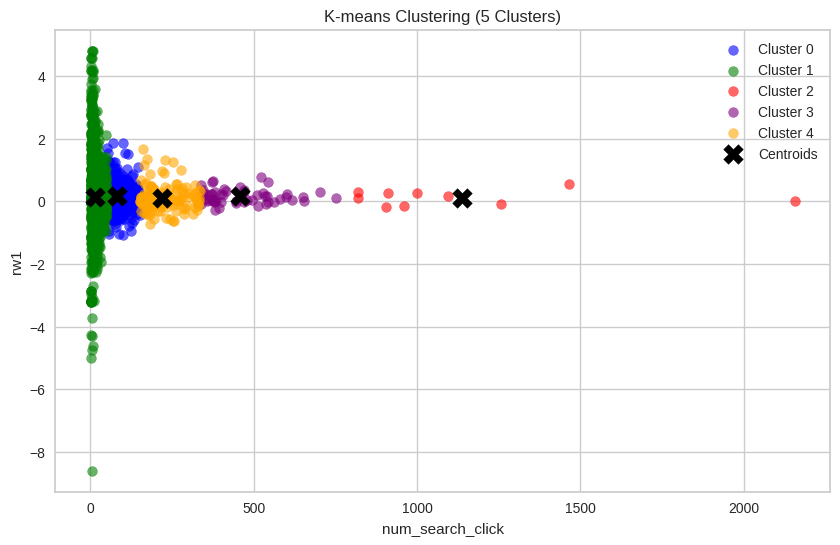

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the variables to plot
x_col = "num_search_click"  # Replace with x-axis column, e.g., "Session Count"
y_col = "rw1"  # Replace with y-axis column, e.g., "Percentage of Sessions with Purchases"

# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data[[x_col, y_col]])

# Plot the results
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(
        cluster_data[x_col],
        cluster_data[y_col],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters)")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




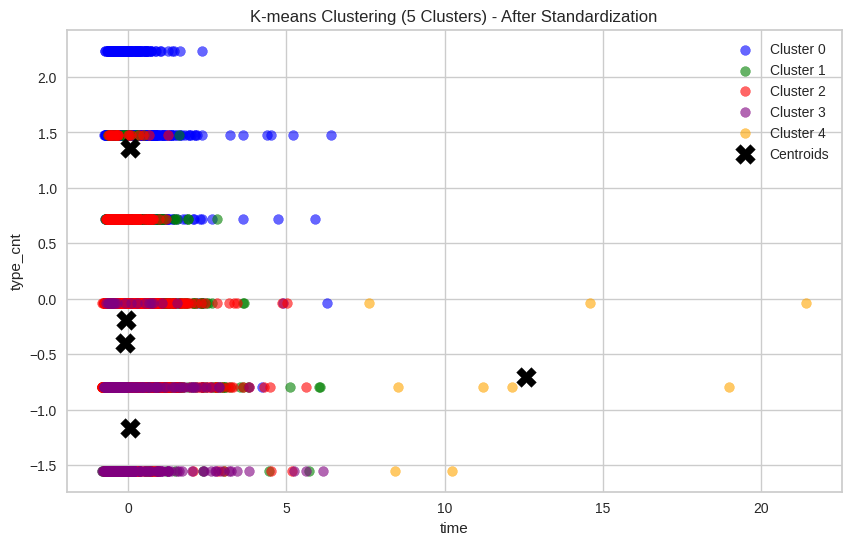

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the variables to be standardized
features = data.loc[:, "time":"risk_level_buy"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using a scatter plot (example: using the first two variables for visualization)
x_col = "time"  # Replace with appropriate column for x-axis
y_col = "type_cnt"  # Replace with appropriate column for y-axis
x = features_scaled[:, 0]  # Scaled version of x_col
y = features_scaled[:, 1]  # Scaled version of y_col

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_indices = data['cluster'] == cluster
    plt.scatter(
        x[cluster_indices],
        y[cluster_indices],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters) - After Standardization")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


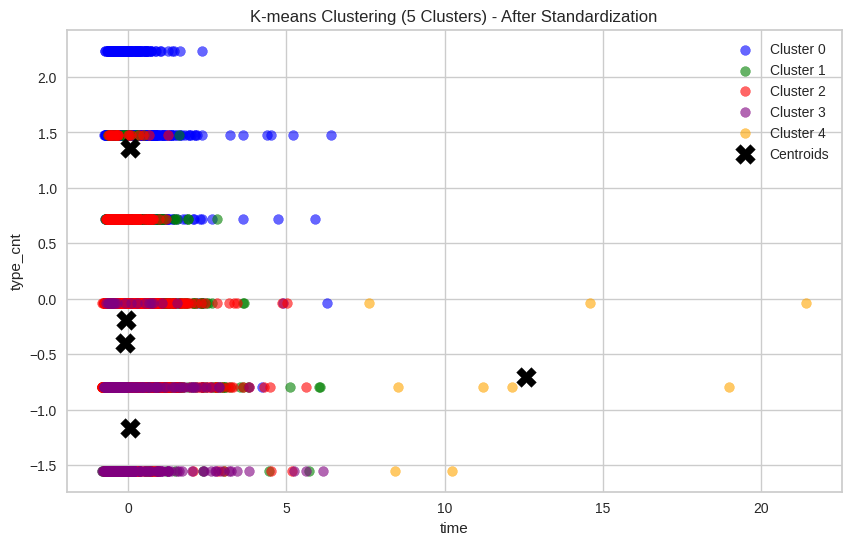

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the variables to be standardized
features = data.loc[:, "time":"risk_level_buy"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using a scatter plot
# Example visualization using the first two features for clarity
x_col = "time"  # First feature for x-axis
y_col = "type_cnt"  # Second feature for y-axis
x = features_scaled[:, 0]  # Scaled x_col values
y = features_scaled[:, 1]  # Scaled y_col values

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_indices = data['cluster'] == cluster
    plt.scatter(
        x[cluster_indices],
        y[cluster_indices],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters) - After Standardization")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


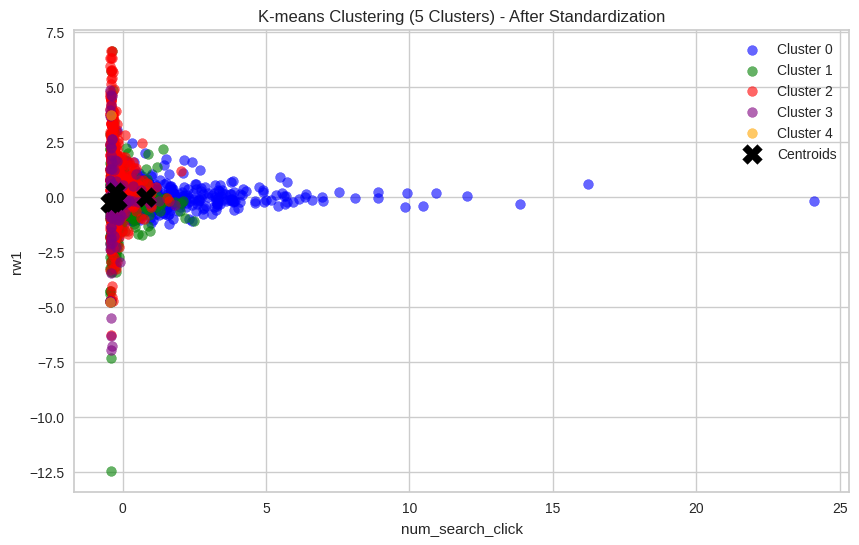

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the variables to be standardized
features = data.loc[:, "time":"risk_level_buy"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using a scatter plot
# Example visualization using num_search_click and rw1 for clarity
x_col = "num_search_click"  # Feature for x-axis
y_col = "rw1"  # Feature for y-axis
x = features_scaled[:, features.columns.get_loc(x_col)]  # Scaled x_col values
y = features_scaled[:, features.columns.get_loc(y_col)]  # Scaled y_col values

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_indices = data['cluster'] == cluster
    plt.scatter(
        x[cluster_indices],
        y[cluster_indices],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, features.columns.get_loc(x_col)],
    centroids[:, features.columns.get_loc(y_col)],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters) - After Standardization")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


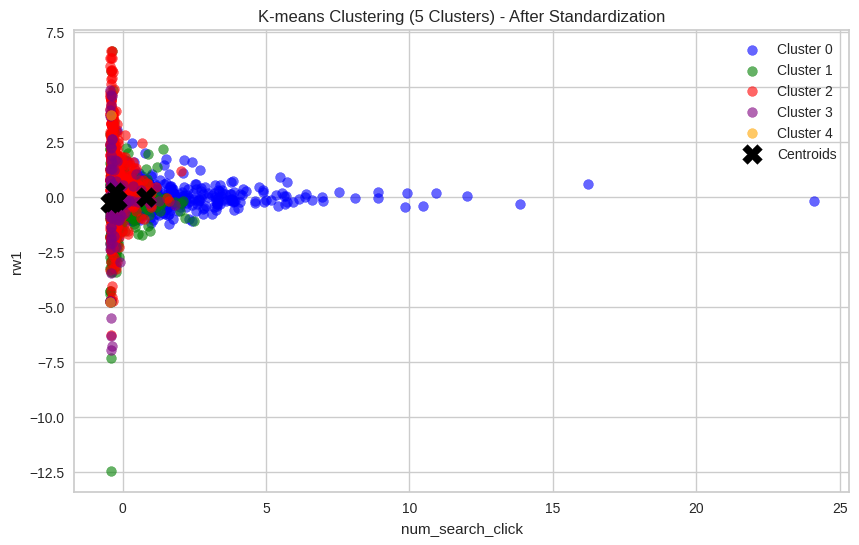

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the features to standardize
features = data.loc[:, "time":"risk_level_buy"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using a scatter plot
# For visualization, use two variables (example: "num_search_click" and "rw1")
x_col = "num_search_click"  # Feature for x-axis
y_col = "rw1"  # Feature for y-axis
x = features_scaled[:, features.columns.get_loc(x_col)]  # Scaled x-axis data
y = features_scaled[:, features.columns.get_loc(y_col)]  # Scaled y-axis data

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_indices = data['cluster'] == cluster
    plt.scatter(
        x[cluster_indices],
        y[cluster_indices],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, features.columns.get_loc(x_col)],
    centroids[:, features.columns.get_loc(y_col)],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters) - After Standardization")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


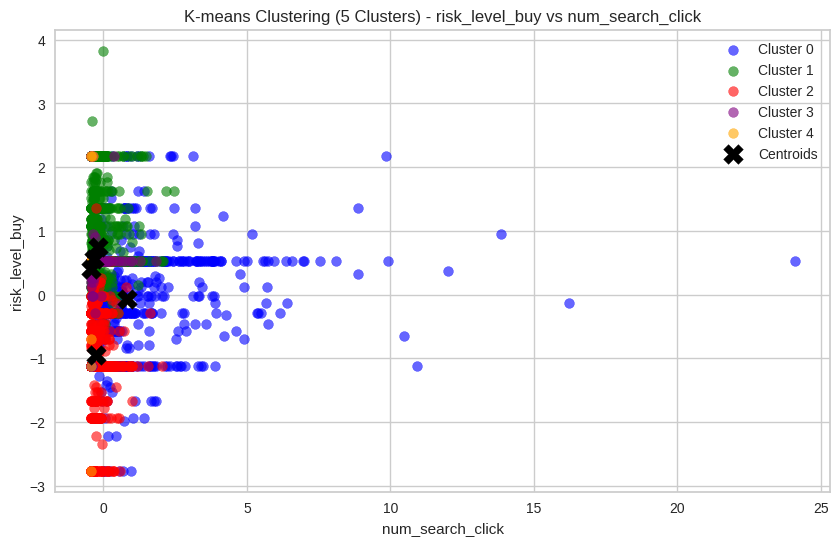

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the features to standardize
features = data.loc[:, "time":"risk_level_buy"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using a scatter plot
x_col = "num_search_click"  # Feature for x-axis
y_col = "risk_level_buy"  # Feature for y-axis
x = features_scaled[:, features.columns.get_loc(x_col)]  # Scaled x-axis data
y = features_scaled[:, features.columns.get_loc(y_col)]  # Scaled y-axis data

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_indices = data['cluster'] == cluster
    plt.scatter(
        x[cluster_indices],
        y[cluster_indices],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, features.columns.get_loc(x_col)],
    centroids[:, features.columns.get_loc(y_col)],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters) - risk_level_buy vs num_search_click")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


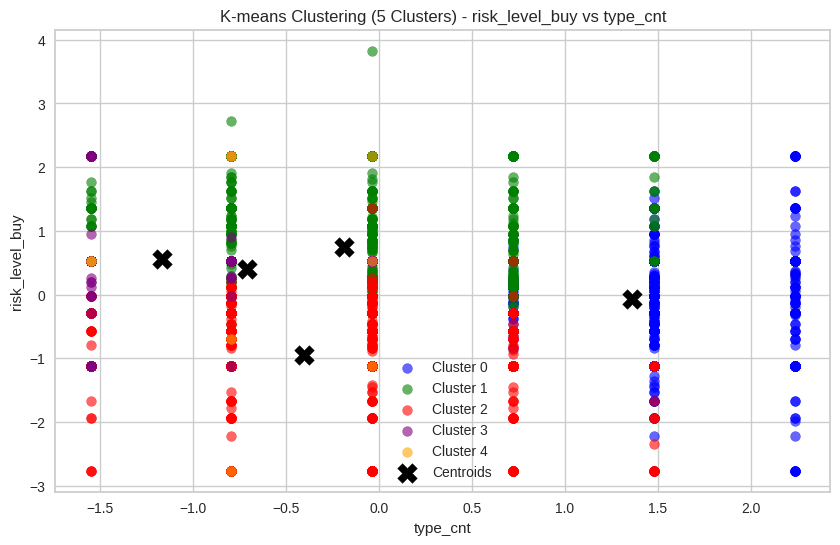

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('CaseFundCustomer.csv')

# Select the features to standardize
features = data.loc[:, "time":"risk_level_buy"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using a scatter plot
x_col = "type_cnt"  # Feature for x-axis
y_col = "risk_level_buy"  # Feature for y-axis
x = features_scaled[:, features.columns.get_loc(x_col)]  # Scaled x-axis data
y = features_scaled[:, features.columns.get_loc(y_col)]  # Scaled y-axis data

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot for each cluster
for cluster in range(kmeans.n_clusters):
    cluster_indices = data['cluster'] == cluster
    plt.scatter(
        x[cluster_indices],
        y[cluster_indices],
        s=50,
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, features.columns.get_loc(x_col)],
    centroids[:, features.columns.get_loc(y_col)],
    s=200, c='black', marker='X', label='Centroids'
)

# Add labels and title
plt.title("K-means Clustering (5 Clusters) - risk_level_buy vs type_cnt")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


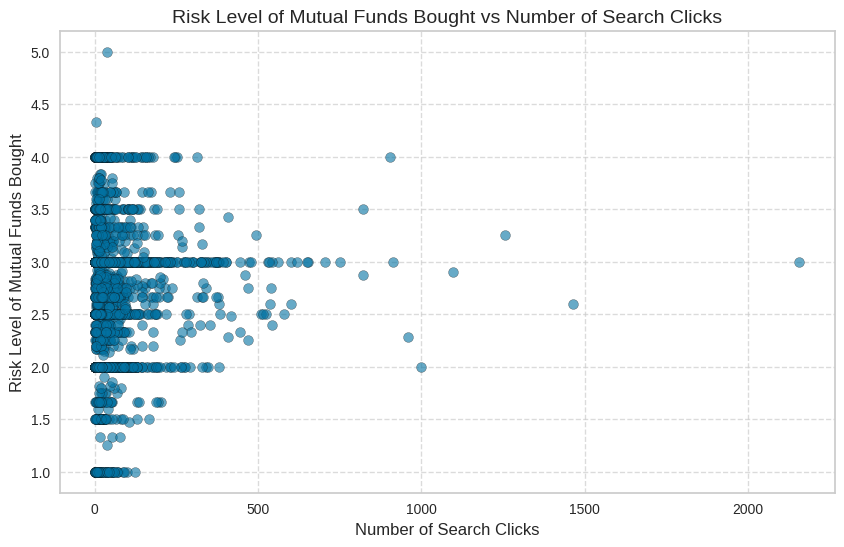

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_csv' with the actual path to the CaseFundCustomer.csv file
data = pd.read_csv('CaseFundCustomer.csv')

# Ensure relevant columns exist in the dataset
if 'num_search_click' in data.columns and 'risk_level_buy' in data.columns:
    # Scatter plot: risk_level_buy vs num_search_click
    plt.figure(figsize=(10, 6))
    plt.scatter(data['num_search_click'], data['risk_level_buy'], alpha=0.6, edgecolors='k', s=50)

    # Customize the plot
    plt.title('Risk Level of Mutual Funds Bought vs Number of Search Clicks', fontsize=14)
    plt.xlabel('Number of Search Clicks', fontsize=12)
    plt.ylabel('Risk Level of Mutual Funds Bought', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("The necessary columns 'num_search_click' and/or 'risk_level_buy' are missing in the dataset.")


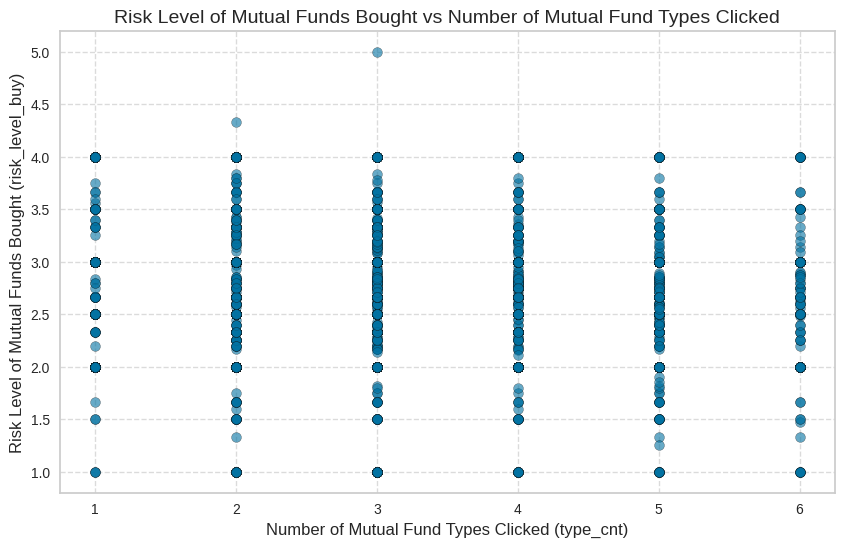

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_csv' with the actual path to the CaseFundCustomer.csv file
data = pd.read_csv('CaseFundCustomer.csv')

# Ensure relevant columns exist in the dataset
if 'type_cnt' in data.columns and 'risk_level_buy' in data.columns:
    # Scatter plot: risk_level_buy vs type_cnt
    plt.figure(figsize=(10, 6))
    plt.scatter(data['type_cnt'], data['risk_level_buy'], alpha=0.6, edgecolors='k', s=50)

    # Customize the plot
    plt.title('Risk Level of Mutual Funds Bought vs Number of Mutual Fund Types Clicked', fontsize=14)
    plt.xlabel('Number of Mutual Fund Types Clicked (type_cnt)', fontsize=12)
    plt.ylabel('Risk Level of Mutual Funds Bought (risk_level_buy)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("The necessary columns 'type_cnt' and/or 'risk_level_buy' are missing in the dataset.")


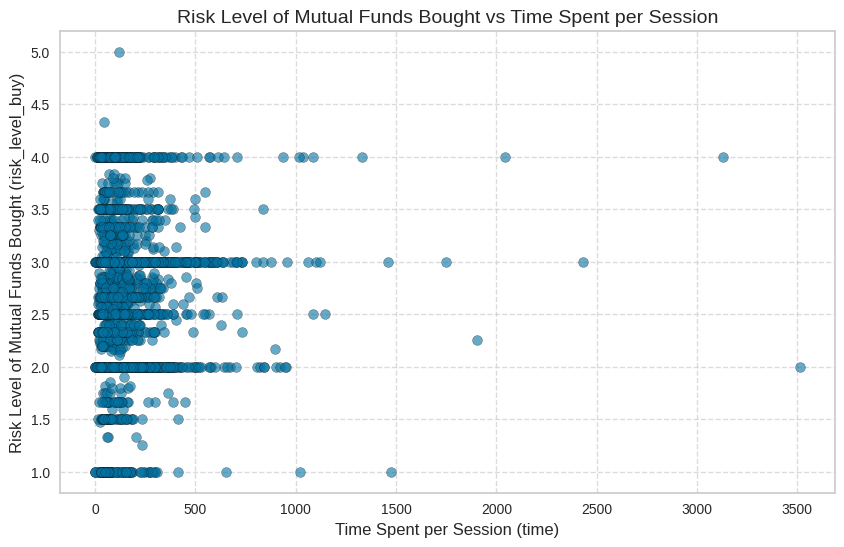

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_csv' with the actual path to the CaseFundCustomer.csv file
data = pd.read_csv('CaseFundCustomer.csv')

# Ensure relevant columns exist in the dataset
if 'time' in data.columns and 'risk_level_buy' in data.columns:
    # Scatter plot: risk_level_buy vs time
    plt.figure(figsize=(10, 6))
    plt.scatter(data['time'], data['risk_level_buy'], alpha=0.6, edgecolors='k', s=50)

    # Customize the plot
    plt.title('Risk Level of Mutual Funds Bought vs Time Spent per Session', fontsize=14)
    plt.xlabel('Time Spent per Session (time)', fontsize=12)
    plt.ylabel('Risk Level of Mutual Funds Bought (risk_level_buy)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("The necessary columns 'time' and/or 'risk_level_buy' are missing in the dataset.")


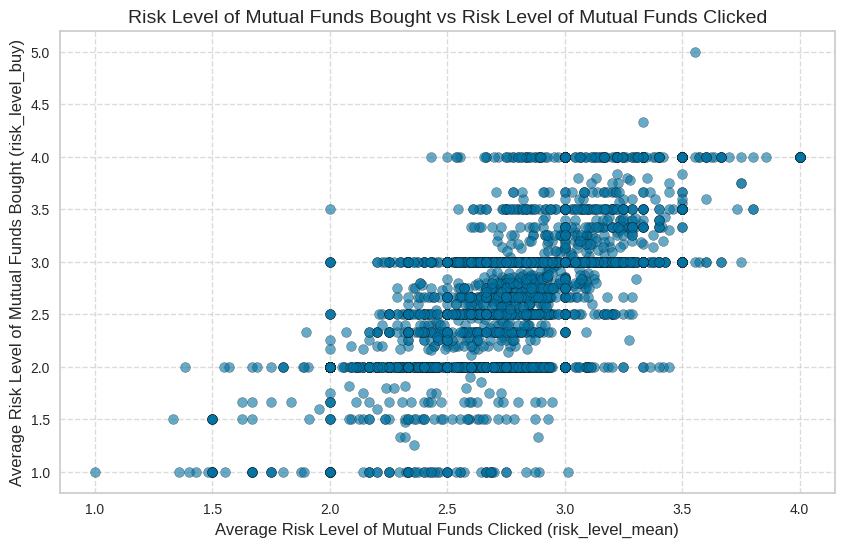

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_csv_casefund' with the actual path to the CaseFundCustomer.csv file
data_casefund = pd.read_csv('CaseFundCustomer.csv')

# Ensure relevant columns exist in the dataset
if 'risk_level_mean' in data_casefund.columns and 'risk_level_buy' in data_casefund.columns:
    # Scatter plot: risk_level_buy vs risk_level_mean
    plt.figure(figsize=(10, 6))
    plt.scatter(data_casefund['risk_level_mean'], data_casefund['risk_level_buy'], alpha=0.6, edgecolors='k', s=50)

    # Customize the plot
    plt.title('Risk Level of Mutual Funds Bought vs Risk Level of Mutual Funds Clicked', fontsize=14)
    plt.xlabel('Average Risk Level of Mutual Funds Clicked (risk_level_mean)', fontsize=12)
    plt.ylabel('Average Risk Level of Mutual Funds Bought (risk_level_buy)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("The necessary columns 'risk_level_mean' and/or 'risk_level_buy' are missing in the dataset.")


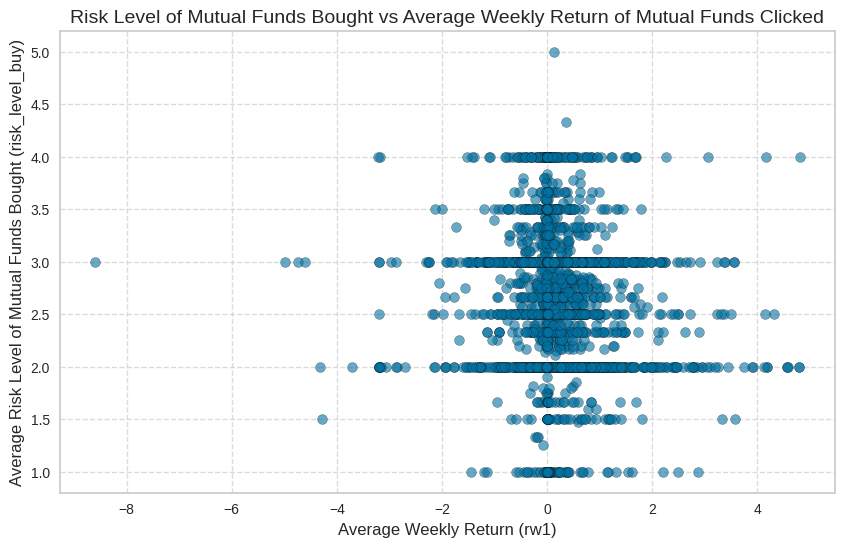

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_csv_casefund' with the actual path to the CaseFundCustomer.csv file
data_casefund = pd.read_csv('CaseFundCustomer.csv')

# Ensure relevant columns exist in the dataset
if 'rw1' in data_casefund.columns and 'risk_level_buy' in data_casefund.columns:
    # Scatter plot: risk_level_buy vs rw1
    plt.figure(figsize=(10, 6))
    plt.scatter(data_casefund['rw1'], data_casefund['risk_level_buy'], alpha=0.6, edgecolors='k', s=50)

    # Customize the plot
    plt.title('Risk Level of Mutual Funds Bought vs Average Weekly Return of Mutual Funds Clicked', fontsize=14)
    plt.xlabel('Average Weekly Return (rw1)', fontsize=12)
    plt.ylabel('Average Risk Level of Mutual Funds Bought (risk_level_buy)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("The necessary columns 'rw1' and/or 'risk_level_buy' are missing in the dataset.")


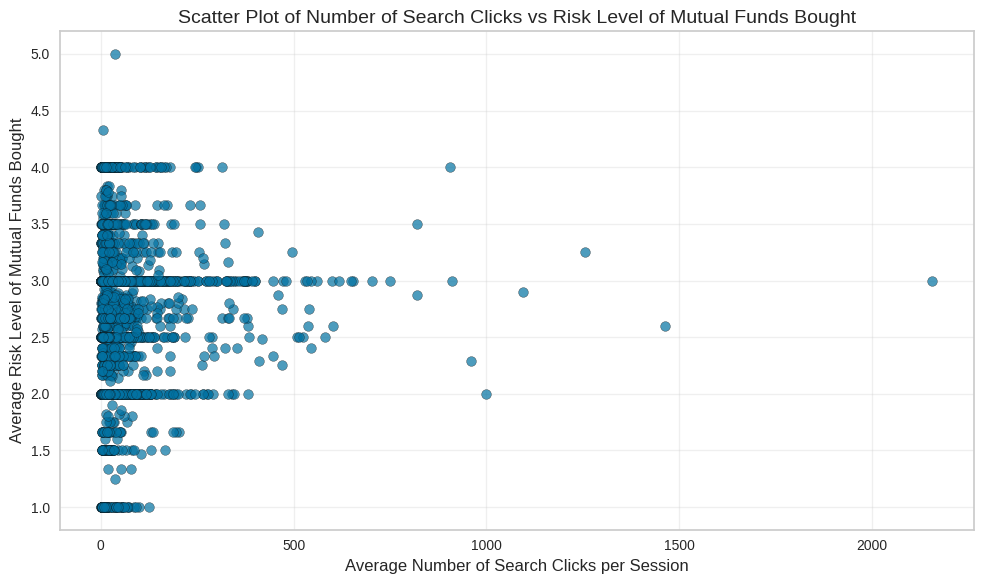

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("CaseFundCustomer.csv")

# Extract the required columns
num_search_click = data['num_search_click']
risk_level_buy = data['risk_level_buy']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(num_search_click, risk_level_buy, alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of Number of Search Clicks vs Risk Level of Mutual Funds Bought', fontsize=14)
plt.xlabel('Average Number of Search Clicks per Session', fontsize=12)
plt.ylabel('Average Risk Level of Mutual Funds Bought', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot (optional)
# plt.savefig("scatter_plot_num_search_click_vs_risk_level_buy.png")

# Show the plot
plt.show()


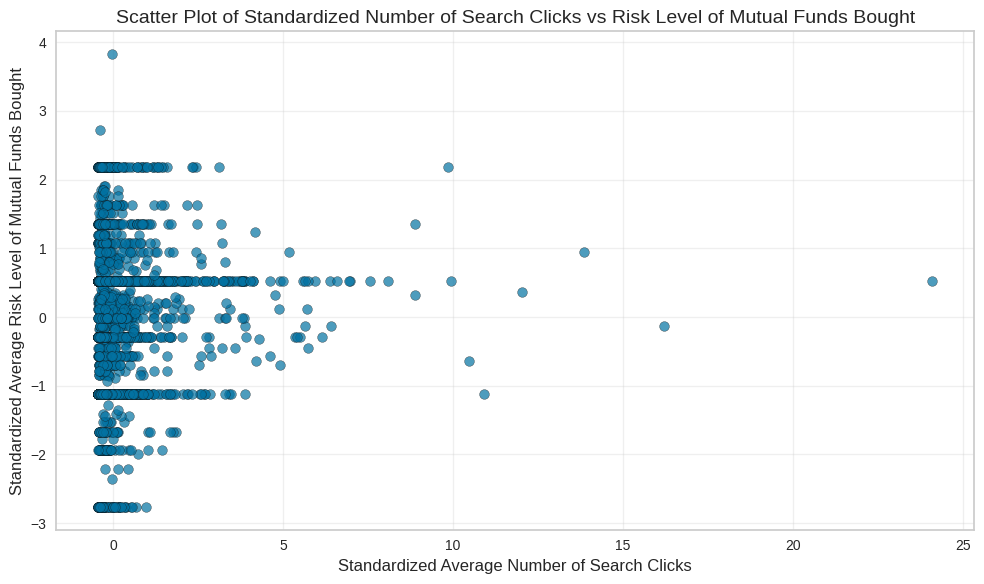

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("CaseFundCustomer.csv")

# Select columns for standardization
columns_to_standardize = ['num_search_click', 'risk_level_buy']
data_to_standardize = data[columns_to_standardize]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_to_standardize)
data_standardized = pd.DataFrame(data_standardized, columns=columns_to_standardize)

# Extract standardized columns
num_search_click_std = data_standardized['num_search_click']
risk_level_buy_std = data_standardized['risk_level_buy']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(num_search_click_std, risk_level_buy_std, alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of Standardized Number of Search Clicks vs Risk Level of Mutual Funds Bought', fontsize=14)
plt.xlabel('Standardized Average Number of Search Clicks', fontsize=12)
plt.ylabel('Standardized Average Risk Level of Mutual Funds Bought', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot (optional)
# plt.savefig("scatter_plot_standardized_num_search_click_vs_risk_level_buy.png")

# Show the plot
plt.show()


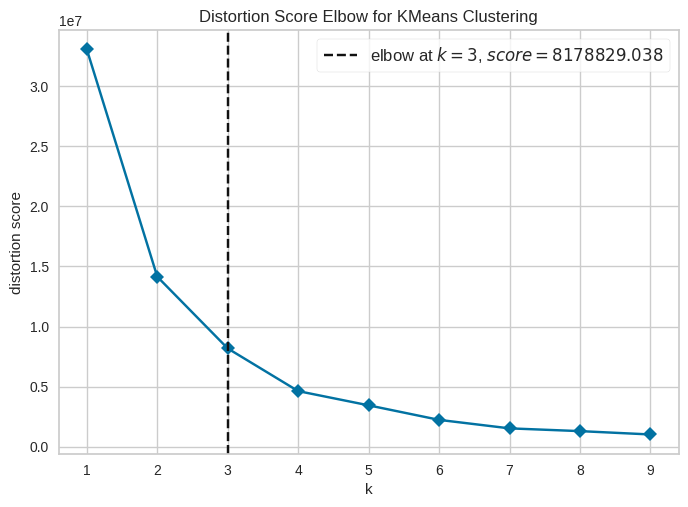

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the dataset
data = pd.read_csv("CaseFundCustomer.csv")

# Select the relevant features for clustering (you can include more columns if needed)
features = ['num_search_click', 'risk_level_buy']
data_for_clustering = data[features]

# Initialize the KMeans model
kmeans = KMeans(random_state=42)

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)

# Fit the visualizer to the data
visualizer.fit(data_for_clustering)

# Render the plot
visualizer.show()


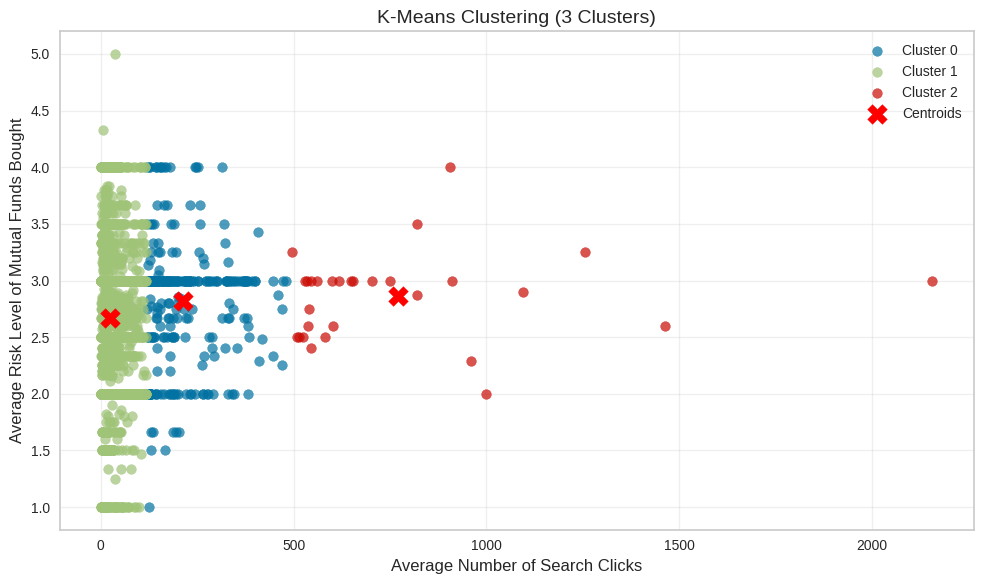

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("CaseFundCustomer.csv")

# Select the relevant features for clustering (you can include more columns if needed)
features = ['num_search_click', 'risk_level_buy']
data_for_clustering = data[features]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualization of clustering
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster_id in range(3):
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['num_search_click'],
                cluster_data['risk_level_buy'],
                label=f'Cluster {cluster_id}', alpha=0.7)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')

# Add titles and labels
plt.title('K-Means Clustering (3 Clusters)', fontsize=14)
plt.xlabel('Average Number of Search Clicks', fontsize=12)
plt.ylabel('Average Risk Level of Mutual Funds Bought', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot (optional)
# plt.savefig("kmeans_clustering_result.png")

# Show the plot
plt.show()


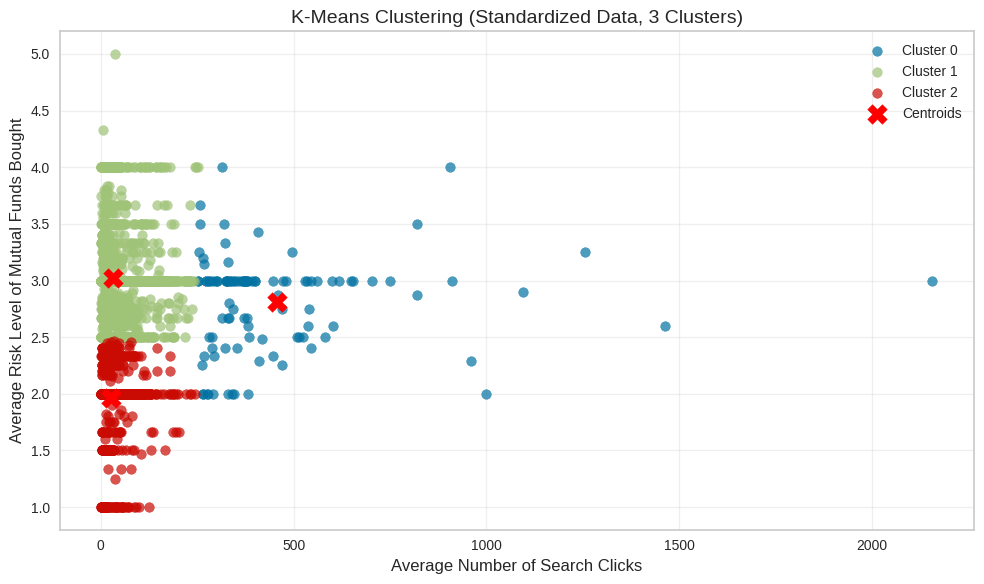

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("CaseFundCustomer.csv")

# Select the relevant features for clustering (you can include more columns if needed)
features = ['num_search_click', 'risk_level_buy']
data_for_clustering = data[features]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_clustering)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_standardized)

# Add cluster labels to the original dataset
data['cluster'] = clusters

# Visualization of clustering
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster_id in range(3):
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['num_search_click'],
                cluster_data['risk_level_buy'],
                label=f'Cluster {cluster_id}', alpha=0.7)

# Plot the centroids (transforming back to the original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')

# Add titles and labels
plt.title('K-Means Clustering (Standardized Data, 3 Clusters)', fontsize=14)
plt.xlabel('Average Number of Search Clicks', fontsize=12)
plt.ylabel('Average Risk Level of Mutual Funds Bought', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot (optional)
# plt.savefig("kmeans_clustering_standardized_result.png")

# Show the plot
plt.show()


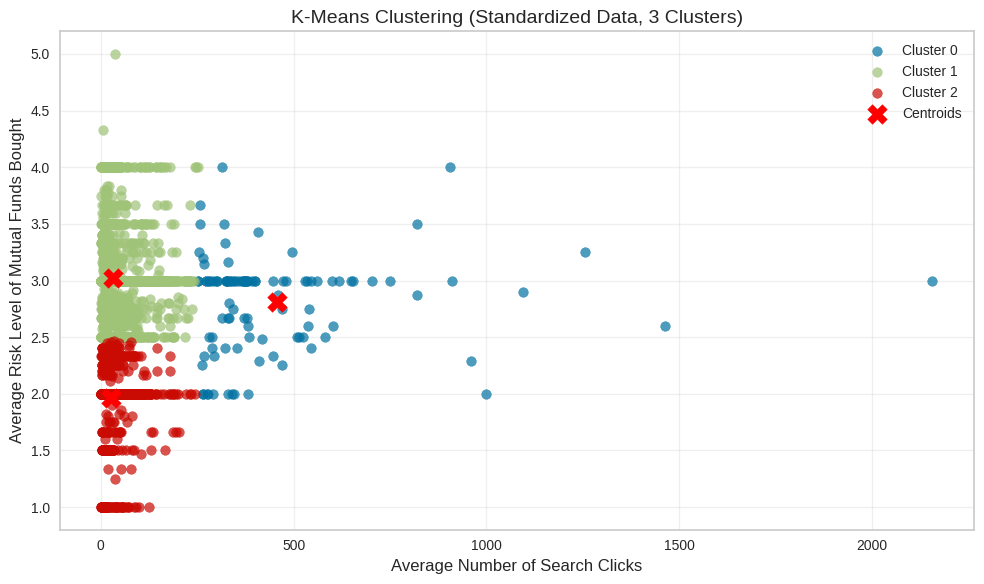

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("CaseFundCustomer.csv")

# Select features for clustering
features = ['num_search_click', 'risk_level_buy']
data_for_clustering = data[features]

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_clustering)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_standardized)

# Add the cluster assignments to the original DataFrame
data['cluster'] = clusters

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each cluster in a different color
for cluster_id in range(3):
    cluster_points = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_points['num_search_click'],
                cluster_points['risk_level_buy'],
                label=f'Cluster {cluster_id}', alpha=0.7)

# Plot centroids (back-transformed to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')

# Add titles and labels
plt.title('K-Means Clustering (Standardized Data, 3 Clusters)', fontsize=14)
plt.xlabel('Average Number of Search Clicks', fontsize=12)
plt.ylabel('Average Risk Level of Mutual Funds Bought', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot (optional)
# plt.savefig("kmeans_standardized_clusters.png")

# Show the plot
plt.show()
